In [4]:
import pandas as pd
import numpy as np

import re
import string

import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
#nltk.download('stopwords') # run this one time

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/de11675/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
english= pd.read_csv("english.csv")
print(english.head(2))
print(len(english))

                                          eng_review  \
0  friendly welcome extra helpful they gave detai...   
1  excellent service and an overall great experie...   

                                    lemma_eng_review  \
0  friendly welcome extra helpful they give detai...   
1  excellent service and an overall great experie...   

                                         rev_stopped  \
0  friendly welcome extra helpful gave detailed a...   
1  excellent service overall great experience got...   

                                       lemma_stopped  
0  friendly welcome extra helpful detailed answer...  
1  excellent service overall great experience exp...  
6519


In [3]:
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

In [5]:
english.dropna(axis = 0, how ='any',inplace=True) 

english['eng_review'] = english['eng_review'].apply(clean_text)
english['Num_words_text'] = english['eng_review'].apply(lambda x:len(str(x).split())) 

print('-------Dataset --------')
print(len(english))
print('-------------------------')
max_review_data_sentence_length  = english['Num_words_text'].max()

mask = (english['Num_words_text'] < 100) & (english['Num_words_text'] >=20)
df_short_reviews = english[mask]

print('No of Short reviews')
print(len(df_short_reviews))

-------Dataset --------
6479
-------------------------
No of Short reviews
2321


In [6]:
# pre process data
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
english['eng_review']=english['eng_review'].apply(remove_stopwords)

In [7]:
import en_core_web_sm

nlp = en_core_web_sm.load()

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
    output = []
    for sent in texts:
        doc = nlp(sent) 
        output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
    return output

In [8]:
text_list=english['eng_review'].tolist()
print(text_list[1])
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[1])

excellent service overall great experience express service appointment next friendly customer oriented service always reachable transparent work costs great communication also third party needed involved case recommendation
['excellent', 'service', 'overall', 'great', 'experience', 'express', 'service', 'appointment', 'friendly', 'customer', 'service', 'reachable', 'transparent', 'work', 'great', 'communication', 'third', 'party', 'involved', 'case', 'recommendation']


In [9]:
#Create vocabulary dictionary and document term matrix

dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

In [10]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [11]:
lda_model.print_topics()

[(0,
  '0.029*"service" + 0.027*"workshop" + 0.024*"part" + 0.021*"repair" + 0.017*"cost" + 0.017*"rental" + 0.016*"problem" + 0.015*"time" + 0.014*"week" + 0.012*"free"'),
 (1,
  '0.038*"time" + 0.017*"year" + 0.014*"vehicle" + 0.014*"damage" + 0.013*"customer" + 0.013*"problem" + 0.012*"company" + 0.012*"employee" + 0.011*"care" + 0.011*"contract"'),
 (2,
  '0.088*"customer" + 0.082*"service" + 0.022*"vehicle" + 0.021*"time" + 0.018*"year" + 0.017*"good" + 0.015*"advisor" + 0.014*"problem" + 0.014*"dealership" + 0.013*"employee"'),
 (3,
  '0.074*"much" + 0.029*"handling" + 0.015*"wish" + 0.014*"pleasure" + 0.013*"other" + 0.013*"hose" + 0.012*"arrogant" + 0.012*"family" + 0.011*"worth" + 0.011*"event"'),
 (4,
  '0.137*"friendly" + 0.108*"staff" + 0.081*"service" + 0.060*"nice" + 0.048*"competent" + 0.036*"great" + 0.032*"super" + 0.029*"good" + 0.028*"helpful" + 0.013*"courteous"'),
 (5,
  '0.066*"seller" + 0.050*"car" + 0.030*"dealership" + 0.024*"customer" + 0.022*"price" + 0.018*"

In [12]:
# Visualize the topics
#https://github.com/bmabey/pyLDAvis
#https://speakerdeck.com/bmabey/visualizing-topic-models
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.save_html(vis, "top_5.html")

/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in fav

In [16]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.9406341952695865

Coherence Score:  -4.62473167816283


In [19]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='u_mass')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [20]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_reviews, start=2, limit=50, step=1)


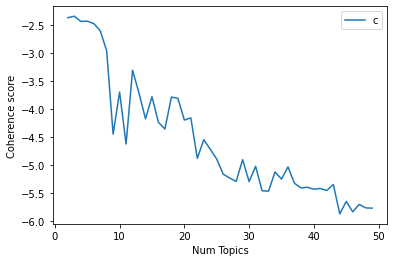

In [21]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [22]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of -2.365
Num Topics = 3  has Coherence Value of -2.3388
Num Topics = 4  has Coherence Value of -2.4306
Num Topics = 5  has Coherence Value of -2.4279
Num Topics = 6  has Coherence Value of -2.4693
Num Topics = 7  has Coherence Value of -2.5945
Num Topics = 8  has Coherence Value of -2.9571
Num Topics = 9  has Coherence Value of -4.4487
Num Topics = 10  has Coherence Value of -3.6958
Num Topics = 11  has Coherence Value of -4.6248
Num Topics = 12  has Coherence Value of -3.3046
Num Topics = 13  has Coherence Value of -3.7151
Num Topics = 14  has Coherence Value of -4.1753
Num Topics = 15  has Coherence Value of -3.7789
Num Topics = 16  has Coherence Value of -4.2378
Num Topics = 17  has Coherence Value of -4.3567
Num Topics = 18  has Coherence Value of -3.7846
Num Topics = 19  has Coherence Value of -3.8079
Num Topics = 20  has Coherence Value of -4.1964
Num Topics = 21  has Coherence Value of -4.1572
Num Topics = 22  has Coherence Value of -4.8817
N

In [23]:
# Select the model and print the topics
optimal_model = model_list[9]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.041*"friendly" + 0.036*"dealership" + 0.035*"seller" + 0.033*"competent" + 0.028*"advice" + 0.022*"customer" + 0.020*"good" + 0.020*"great" + 0.019*"sale" + 0.015*"satisfied"'),
 (1,
  '0.030*"service" + 0.022*"dealership" + 0.022*"appointment" + 0.021*"vehicle" + 0.018*"customer" + 0.018*"time" + 0.018*"problem" + 0.013*"phone" + 0.012*"friendly" + 0.011*"week"'),
 (2,
  '0.071*"service" + 0.068*"friendly" + 0.050*"nice" + 0.036*"staff" + 0.032*"competent" + 0.029*"great" + 0.029*"advice" + 0.028*"good" + 0.026*"thank" + 0.019*"time"'),
 (3,
  '0.050*"service" + 0.037*"good" + 0.030*"customer" + 0.027*"friendly" + 0.017*"dealership" + 0.015*"competent" + 0.015*"center" + 0.014*"advice" + 0.013*"time" + 0.013*"employee"'),
 (4,
  '0.039*"tire" + 0.028*"service" + 0.024*"customer" + 0.022*"minute" + 0.015*"time" + 0.012*"appointment" + 0.012*"seller" + 0.011*"workshop" + 0.010*"hour" + 0.010*"good"'),
 (5,
  '0.089*"great" + 0.087*"service" + 0.060*"good" + 0.054*"advice" + 0.